In [1]:
import numpy as np

a = np.array([2,3,4])
print("a=", a)
print(f"Dimension of a: {a.shape}")

a= [2 3 4]
Dimension of a: (3,)


In [3]:
b = np.array([[1.5,2,3], [4,5,6]])
print(b)
print(f"Dimension of b: {b.shape}")

[[1.5 2.  3. ]
 [4.  5.  6. ]]
Dimension of b: (2, 3)


In [4]:
print(np.zeros((3,4)))
print(np.ones((2,3)))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


In [5]:
print(np.arange(10, 30, 5))
# use linspace to define a numpy array
# this array should start with 0, end with 2, and have 9 elements
print(np.linspace(0, 2, 9))

[10 15 20 25]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


In [6]:
# do the next step in the next cell
a = np.arange(6)
print(f"a: {a}")

# reshape a to a 4x3 matrix
b = np.arange(12).reshape(4,3)
print(f"b:\n{b}")

a: [0 1 2 3 4 5]
b:
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [7]:
# create a
a = np.array([20,30,40,50])
print(f"a: {a}")

# create b
b = np.arange(4)

# calculate c
c = a-b

# let's see what we have
print(f"c: {c}")

# create two numpy matrices from lists of lists
a = np.array([
    [1,1],
    [0,1]
])
b = np.array([
    [2,0],
    [3,4]
])

# calculate the element-wise product
print(f"a*b:\n{a*b}")

# calculate the matrix product
print(f"a@b:\n{a@b}")

# calculate the matrix product in a different way
print(f"a.dot(b):\n{a.dot(b)}")

a: [20 30 40 50]
c: [20 29 38 47]
a*b:
[[2 0]
 [0 4]]
a@b:
[[5 4]
 [3 4]]
a.dot(b):
[[5 4]
 [3 4]]


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

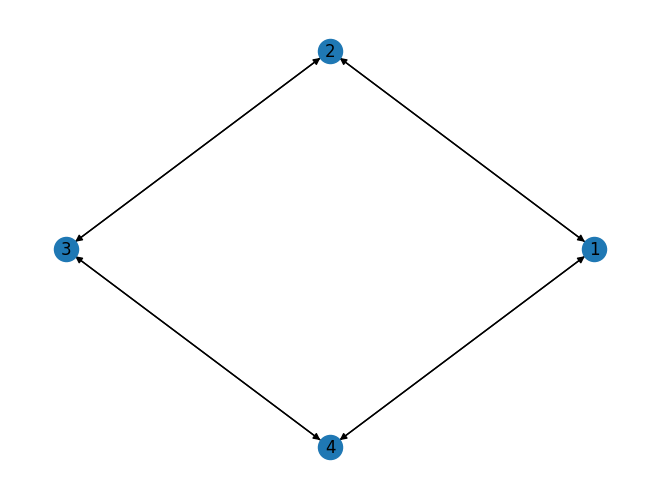

In [9]:
G = nx.DiGraph()
nx.add_cycle(G, [1,2,3,4])
nx.add_cycle(G, [4,3,2,1])

nx.draw_circular(G, with_labels=True)

In [10]:
# let's build W: weight matrix of G
W = nx.adjacency_matrix(G).toarray()
print(f"W:\n{W}")

# let's build D: degree matrix of G
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
print(f"D:\n{D}")

# P = D^(-1) * W
P = np.linalg.inv(D) @ W
print(f"P:\n{P}")

W:
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]
D:
[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]]
P:
[[0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]]


In [11]:
# calculate the power of a matrix
Wx = np.linalg.matrix_power(W, 10)
print(f"W2:\n{Wx}")

# note that Wx always contains zeros
# this because it is a directed periodic graph

# let's check this assumption using networkx
print(f"G is: {'aperiodic' if nx.is_aperiodic(G) else 'periodic'}")

W2:
[[512   0 512   0]
 [  0 512   0 512]
 [512   0 512   0]
 [  0 512   0 512]]
G is: periodic


G2 is: aperiodic


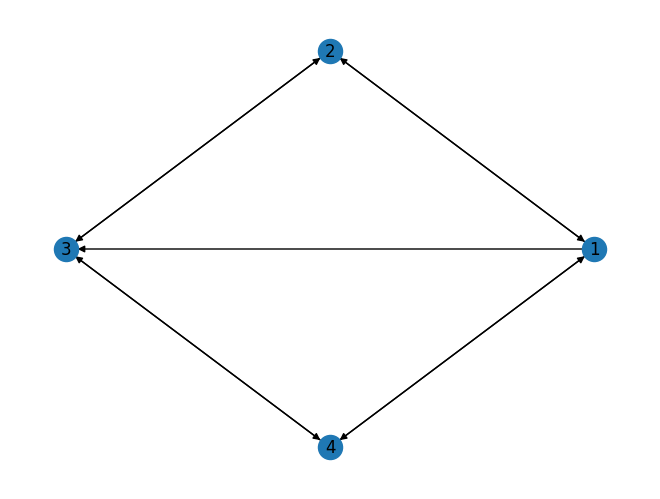

In [12]:
# modify G to make it aperiodic
G2 = G.copy()
G2.add_edge(1,3)
nx.draw_circular(G2, with_labels=True)
print(f"G2 is: {'aperiodic' if nx.is_aperiodic(G2) else 'periodic'}")

In [13]:
W2 = nx.adjacency_matrix(G2).toarray()
degrees = np.sum(W2, axis=1)
D2 = np.diag(degrees)
print(f"D2:\n{D2}")

P2 = np.linalg.inv(D2) @ W2
print(f"P2:\n{P2}")

D2:
[[3 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]]
P2:
[[0.         0.33333333 0.33333333 0.33333333]
 [0.5        0.         0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.5        0.         0.5        0.        ]]


In [14]:
power: np.array = W2
# while power has at least one element equal to 0
# print the power and calculate the next power
count: int = 1
while np.any(power == 0):
    power = power @ W2
    count += 1
    
print(f"W ^ {count} : is the first non-zero matrix.\n{power}")

W ^ 4 : is the first non-zero matrix.
[[ 8  6 10  6]
 [ 2  8  6  8]
 [ 8  2  8  2]
 [ 2  8  6  8]]


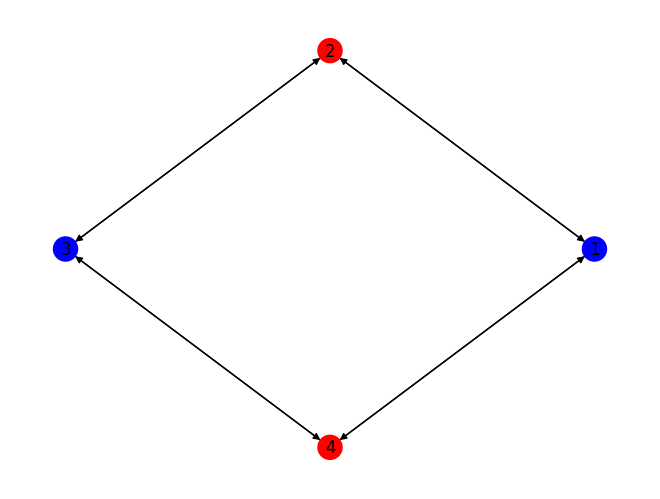

In [15]:
# let's build a generator for colors

def color_generator():
    while 1:
        yield 'blue'
        yield 'red'        
c = color_generator()

nx.draw_circular(G, with_labels=True, node_color=[next(c) for _ in G.nodes])

In [17]:
# consider G: 
# check if it is bipartite
print(f"G is {'bipartite' if nx.is_bipartite(G) else 'not bipartite'}")

# Perron-Frobenius theorem
# if a graph is bipartite, then the spectrum 
# of its normalized adjacency matrix contains -1

# let's build the normalized adjacency matrix
W = nx.adjacency_matrix(G).toarray()
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# calculate the eigenvalues of P
eigenvalues = np.linalg.eigvals(P)
print(f"Eigenvalues of P:\n{eigenvalues}")


G is bipartite
Eigenvalues of P:
[-1.00000000e+00  3.29868511e-17  1.00000000e+00  0.00000000e+00]
